In [1]:
import numpy as np
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

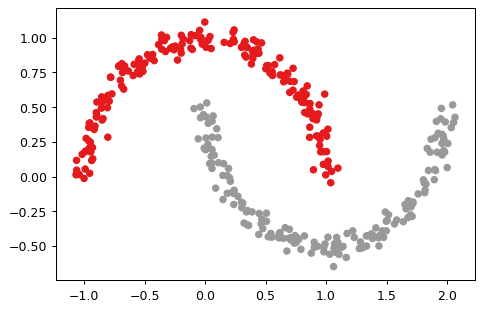

In [2]:
np.random.seed(0)
coord, cl = make_moons(500, noise=0.05)
X, Xt, y, yt = train_test_split(coord, cl,
                                test_size=0.30,
                                random_state=0)

cmap_set1 = plt.cm.Set1
fig, ax = plt.subplots(dpi=90)
ax.scatter(X[:,0], X[:,1], s=25, c=y, cmap=cmap_set1)
plt.show()

In [3]:
import tensorflow.keras as keras

model = keras.models.Sequential()
model.add(keras.layers.Input(2,))
model.add(keras.layers.Dense(8, activation='relu'))
model.add(keras.layers.Dense(8, activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['acc'])

model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 24        
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 72        
_________________________________________________________________
dropout (Dropout)            (None, 8)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 105
Trainable params: 105
Non-trainable params: 0
_________________________________________________________________


In [4]:
history = model.fit(X, y, epochs=1000, batch_size=64, shuffle=True, verbose=0)

In [5]:
from sklearn.metrics import accuracy_score
predictions = (model.predict(Xt)>=0.5).astype(int)
test_accuracy = accuracy_score(yt, predictions)
print(f"Accuracy on test set: {test_accuracy}")

Accuracy on test set: 1.0


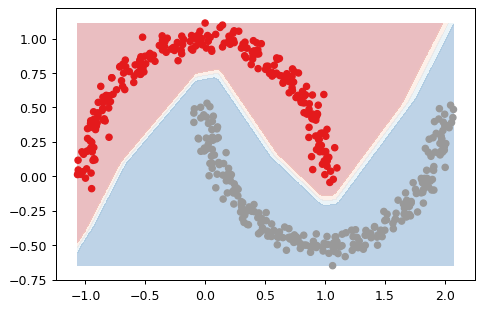

In [6]:
steps = 100
x_min, x_max = coord[:,0].min(), coord[:,0].max()
y_min, y_max = coord[:,1].min(), coord[:,1].max()

x_range = np.linspace(x_min, x_max, steps)
y_range = np.linspace(y_min, y_max, steps)

xx, yy = np.meshgrid(x_range, y_range)
xy = np.stack([np.ravel(xx), np.ravel(yy)], axis=1)
zz = model.predict(xy).reshape(xx.shape)

cmap_rb = plt.get_cmap('RdBu')
fig, ax = plt.subplots(dpi=90)
ax.contourf(xx, yy, zz, cmap=cmap_rb, alpha=0.3, levels=3)
ax.scatter(coord[:,0], coord[:,1], s=25, c=cl, cmap=cmap_set1)
plt.show()